# Auto Insurance Data Analysis

## **Introduction**

This project delves into the critical aspects of an auto insurance company's operations, focusing on customer lifetime value (CLV), customer churn, and response to new policy advertisements. By employing a comprehensive analytical approach, including exploratory data analysis (EDA), survival analysis, and regression modeling, this study aims to provide valuable insights for enhancing customer retention, optimizing marketing strategies, and improving overall profitability. 

The analysis encompasses several key areas:

* **Customer Lifetime Value (CLV):** An in-depth exploration of CLV drivers to identify high-value customer segments and understand their characteristics.
* **Churn Analysis:** A comprehensive evaluation of customer churn patterns using hazard and survival analysis to pinpoint key factors influencing customer attrition.
* **Response to New Policy Advertisements:** An analysis of factors affecting customer response to new policy advertisements, enabling targeted marketing campaigns.
* **Predictive Modeling:** The development of regression models to predict CLV and classification models to forecast customer response to new policies.

Through these analyses, this project seeks to equip the insurance company with actionable insights to optimize its business strategies, enhance customer satisfaction, and drive sustainable growth.


🔗Link to [Dataset](https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data/)

## Exploratory Data Analysis

### Pre-Requisites

In [368]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing stylesheet
cmap_list = [cmap for cmap in sns.color_palette()]

import warnings
warnings.filterwarnings('ignore')

In [369]:
#reading data
df_base=pd.read_csv('./data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df_base.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [370]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Data Cleaning

There are no null elements. However, customer ID, State and Effective To Date are not necessary so we drop them.

In [371]:
df_clean= df_base.drop(['Customer','Effective To Date','State'],axis=1,inplace=False).copy(deep=True)

In [372]:
df_clean.columns

Index(['Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

Number of Open Complaints is treated as int64 but actually its a categorical varaible. Hence, we make it as object for now.

In [373]:
df_clean['Number of Open Complaints']=df_clean['Number of Open Complaints'].astype("object")
df_clean['Number of Policies']=df_clean['Number of Policies'].astype("object")

Converting all non-numeric fields into categorical variables

In [374]:
cat_cols=[x for x in df_clean.columns if df_clean[x].dtype == "object"]
num_cols=[x for x in df_clean.columns if df_clean[x].dtype != "object"]
print(cat_cols)
print(num_cols)

for i in cat_cols:
    df_clean[i]=df_clean[i].astype("category")

df_clean.info()

['Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Total Claim Amount']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Customer Lifetime Value        9134 non-null   float64 
 1   Response                       9134 non-null   category
 2   Coverage                       9134 non-null   category
 3   Education                      9134 non-null   category
 4   EmploymentStatus               9134 non-null   category
 5   Gender                         9134 non-null   category
 6   Income 

In [375]:
print('Category Columns: \n' , cat_cols)
print('\nNumeric Columns: \n' ,num_cols)

Category Columns: 
 ['Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

Numeric Columns: 
 ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Total Claim Amount']


### Customer Lifetime Value Analysis

Let's analyze how each of the feature affect Customer Lifetime Value

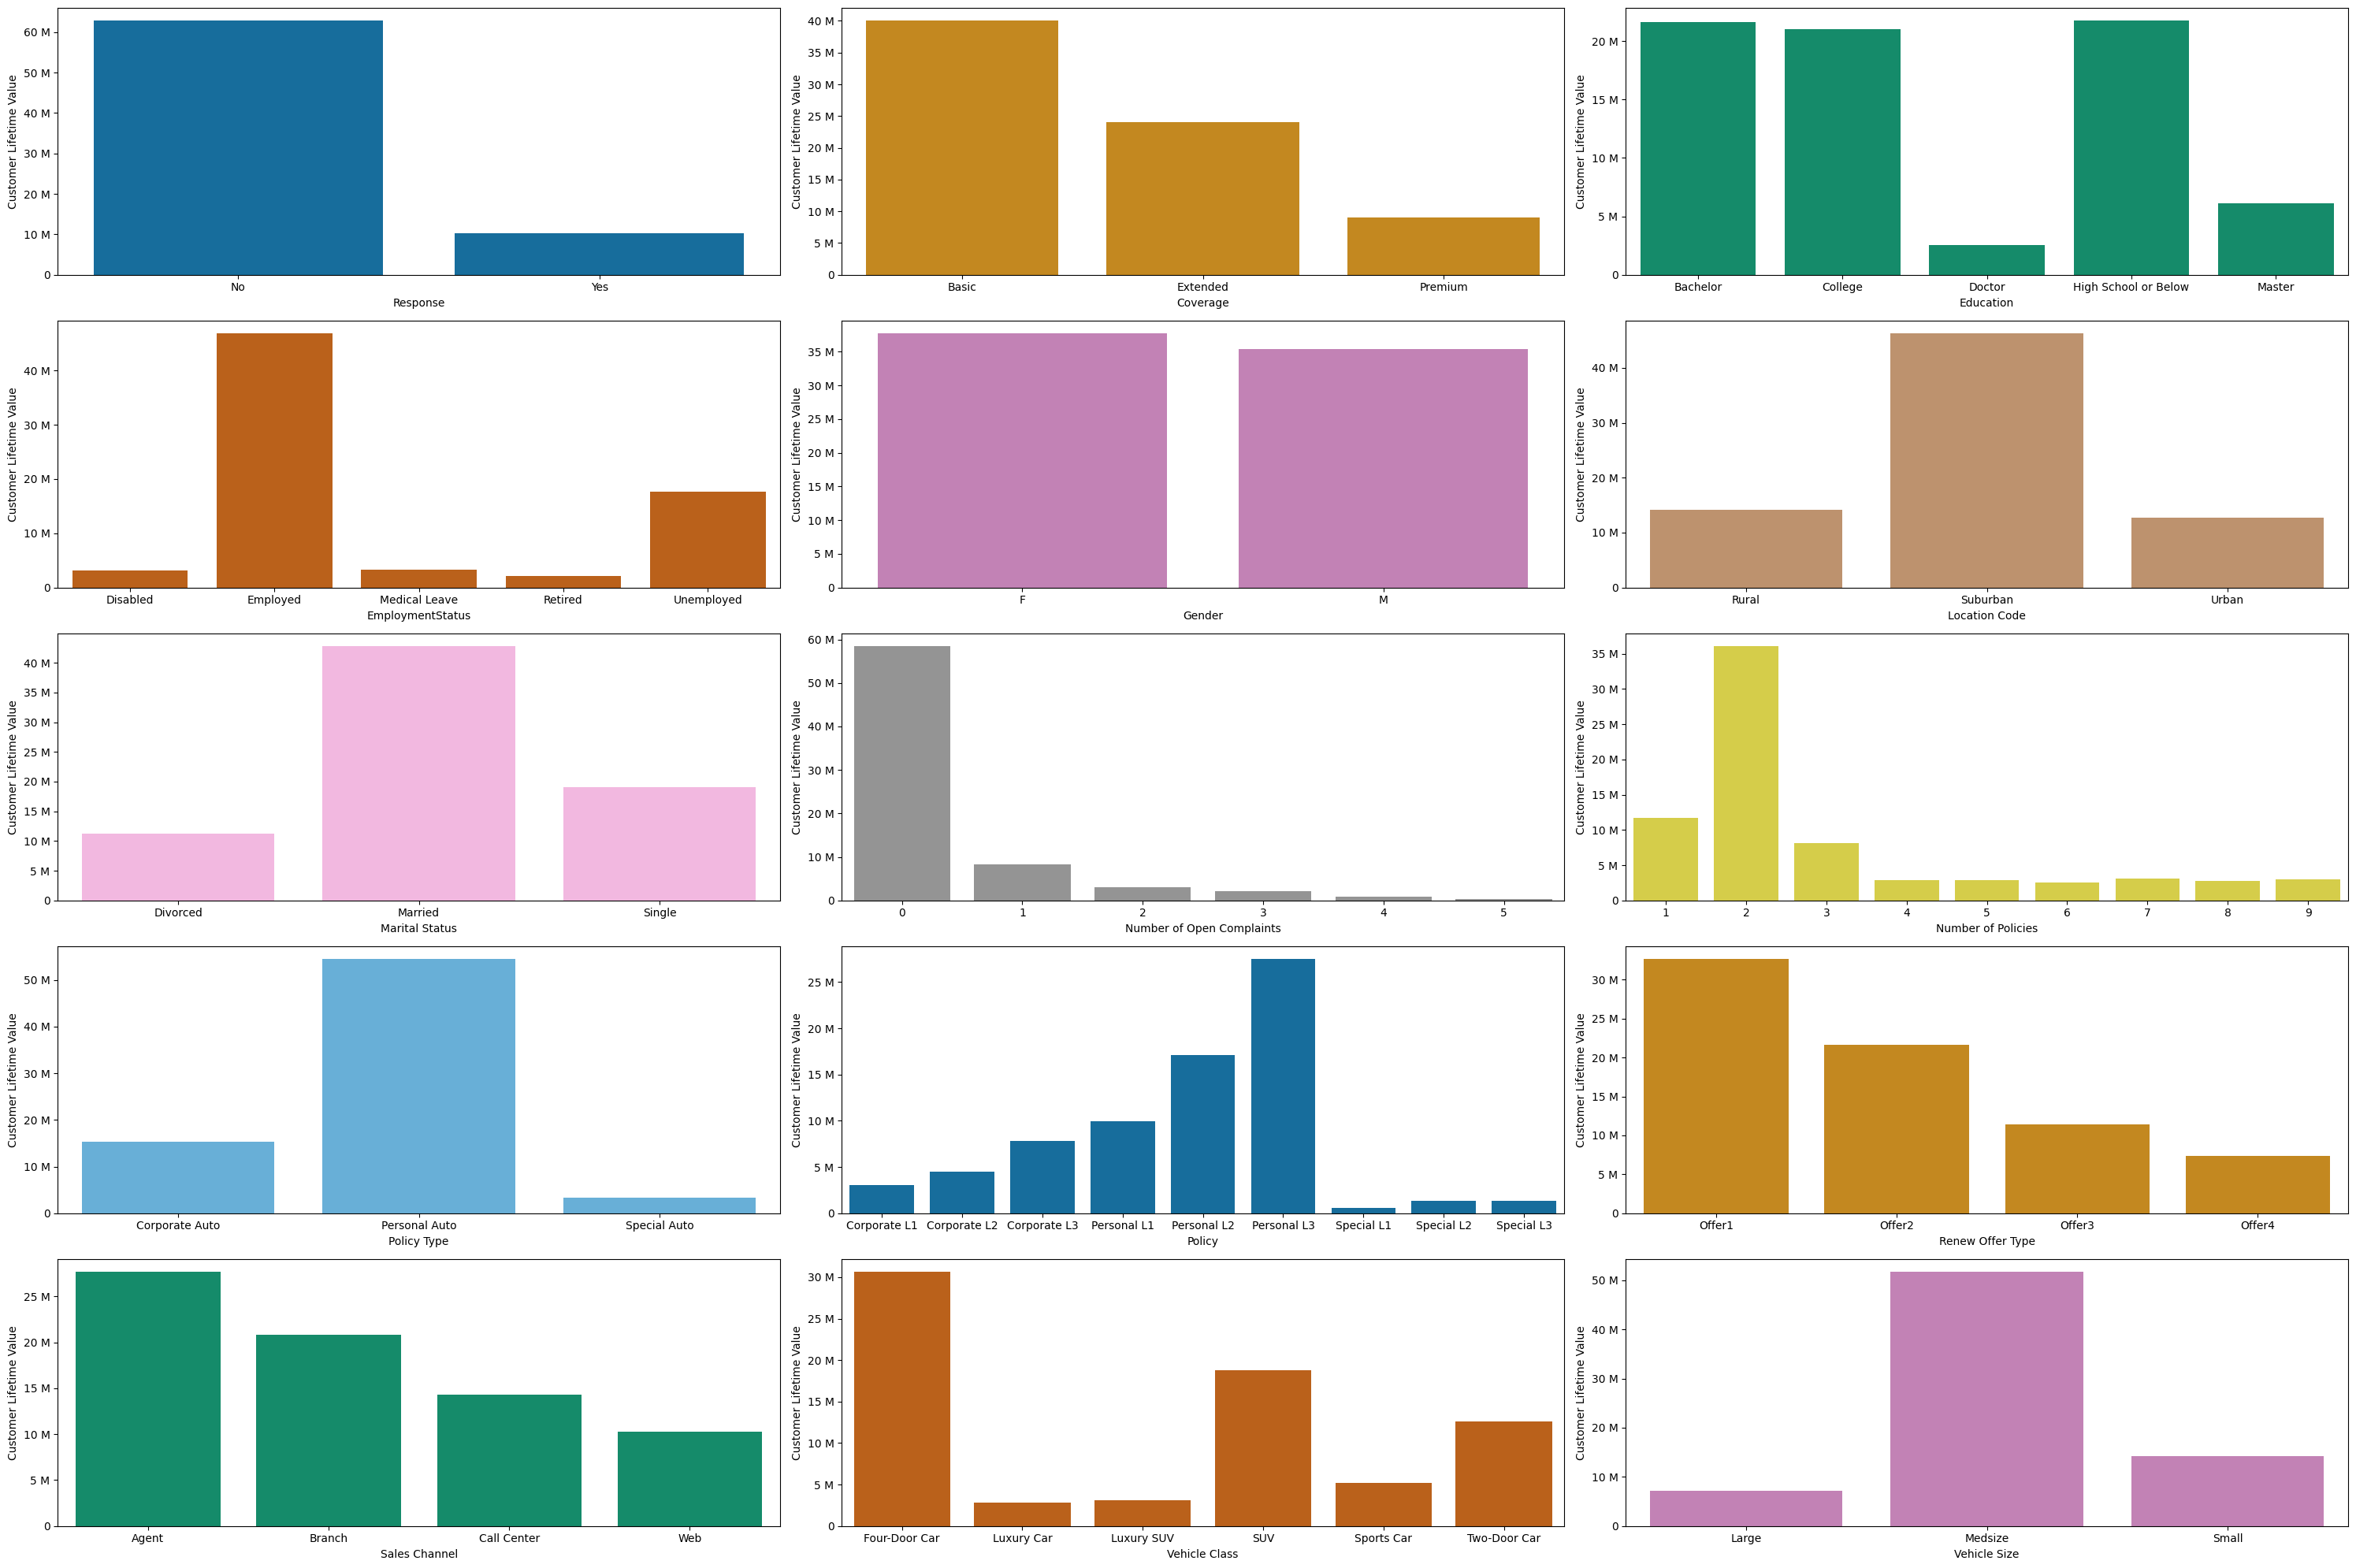

In [376]:
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
fig,ax=plt.subplots(nrows=5,ncols=3,figsize=(30,20))
k=0
for i in range(0,5):
    for j in range(0,3):
        sns.barplot(x=cat_cols[k],y='Customer Lifetime Value',data=df_clean,estimator=sum,ax=ax[i][j],errorbar=None,color = sns.color_palette("colorblind")[k % 10] )
        ax[i][j].yaxis.set_major_formatter(ticker.EngFormatter())
        k+=1

fig.tight_layout()
fig.savefig('./CLV_hist.jpg')

From the above agraph we conclude:
* There is not signigicant change in contribution in the states.
* Customers who has not responded to the email advertisement still give higher CLV then those who responded.
* CLV of customer is Basic > Extended > Premium as expected from a real world.
* Doctorates and Master degree holders have low CLV.
* Most CLV are either employed or unemployed.
* There is equal contributio from male and female.
* Suburban location has highest CLV.
* Married people have high CLV.
* high CLV comes from 0 tickets pending

In [377]:
from sklearn import preprocessing

x = df_clean.copy(deep=True)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x['Customer Lifetime Value'].values.reshape(-1, 1))
x['Customer Lifetime Value'] = pd.DataFrame(x_scaled)

Text(0.5, 1.0, 'Contribution to CLV')

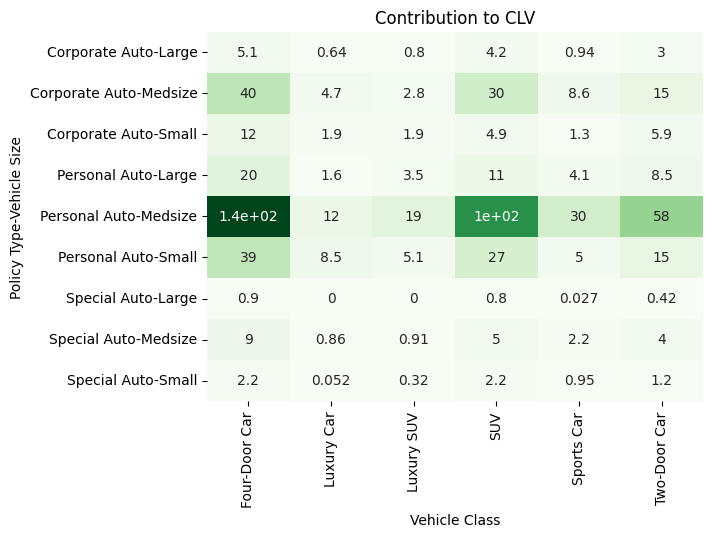

In [378]:
fig,ax=plt.subplots()
table=pd.pivot_table(x,values='Customer Lifetime Value',index=['Policy Type','Vehicle Size'],
               columns=['Vehicle Class'],aggfunc='sum',fill_value=0)

sns.heatmap(table,annot=True,cmap="Greens",cbar=False,ax=ax)
ax.set_title("Contribution to CLV")

#### Insights from the Contribution to CLV Data

**Key Findings:**

* **Personal Auto-Medsize** is the most valuable customer segment in terms of CLV, contributing significantly to overall revenue.
* **Corporate Auto-Large** and **Personal Auto-Large** also contribute substantially, indicating that larger vehicles and corporate customers are generally more profitable.
* **Special Auto** segments, especially **Large** and **Medsize**, have relatively low CLV contributions.
* **Vehicle class** plays a significant role in CLV. **Luxury Car** and **SUV** segments tend to have higher CLV compared to **Four-Door Car** and **Sports Car**.
* **Policy Type-Vehicle Size** combinations like **Personal Auto-Medsize** and **Corporate Auto-Medsize** are particularly valuable, suggesting a strong correlation between policy type, vehicle size, and customer profitability.

**Recommendations:**

* **Prioritize customer acquisition and retention efforts for Personal Auto-Medsize and Corporate Auto-Large segments.**
* **Consider tailoring products and services to meet the specific needs of the Luxury Car and SUV segments.**
* **Evaluate the profitability of Special Auto segments and explore strategies to increase their CLV contribution.**
* **Analyze factors influencing customer churn within each segment to identify areas for improvement.**


### Response analysis

<Axes: title={'center': 'No. of responses to new policy'}, xlabel='Vehicle Class', ylabel='Policy Type-Vehicle Size'>

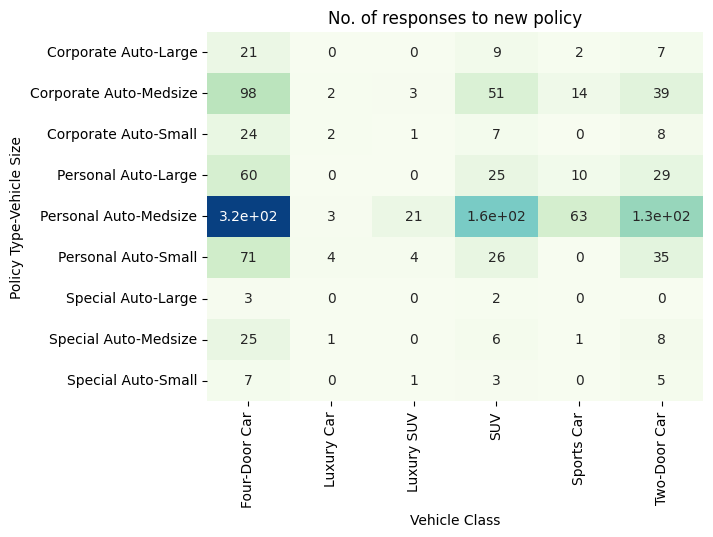

In [379]:
table2=pd.pivot_table(
    x[x['Response']=='Yes'], values='Response',
    index=['Policy Type','Vehicle Size'],
    columns='Vehicle Class',
    aggfunc='count',
    fill_value=0
)

fig,ax=plt.subplots()
ax.set_title("No. of responses to new policy")
sns.heatmap(table2,cmap="GnBu",cbar=False,annot=True)

#### Insights from the No. of Responses to New Policy

**Key Observations:**

* **Personal Auto-Medsize** is the most responsive segment, receiving a significantly higher number of responses across all vehicle classes.
* **Corporate Auto** segments generally have lower response rates compared to **Personal Auto**.
* **Special Auto** segments have the lowest response rates overall, indicating limited interest in new policies.
* **Vehicle class** plays a role in response rates. **Luxury Car** and **SUV** segments tend to have higher responses than **Four-Door Car** and **Sports Car**.
* **Policy Type-Vehicle Size** combinations like **Personal Auto-Medsize** and **Corporate Auto-Medsize** receive a substantial number of responses, suggesting a strong correlation between policy type, vehicle size, and customer interest.

**Recommendations:**

* **Focus marketing efforts on Personal Auto-Medsize and Corporate Auto-Medsize segments.**
* **Tailor marketing messages to the specific needs and preferences of Luxury Car and SUV owners.**
* **Re-evaluate product offerings and pricing for Special Auto segments to increase interest.**
* **Analyze factors influencing response rates within each segment to identify potential barriers and opportunities.**


### Churn Analysis

#### Hazard and Survival

In [380]:
# Initialize the dataset
df_churn=pd.DataFrame(df_clean['Months Since Policy Inception'].value_counts()).sort_values(by='Months Since Policy Inception')
df_churn.rename(columns={'count':'Stopped'},inplace=True)
total_customers=df_churn['Stopped'].sum()

In [381]:
# Calculate Retention

def reten(df,total):
    retention=[total]
    for i in range(1,df.shape[0]):
        t=retention[i-1]-df['Stopped'].iloc[i-1]
        retention.append(t)
    df['Retention']=pd.Series(retention)
    return df

df_churn_r=reten(df_churn.copy(deep=True),total_customers)
    

In [382]:
# Calculate Hazard

def haz(df):
    df['Hazard']=df['Stopped']/df['Retention']
    return df

df_churn_h=haz(df_churn_r.copy(deep=True))

In [383]:
# Calculate Survival
i=0
def sur(df):
    survival=[1]
    for i in range(1,df.shape[0]):
        try:
            t=survival[i-1]*(1-df['Hazard'].iloc[i-1])
            survival.append(t)

        except:
            print(i)
    df['Survival']=pd.Series(survival)
    return df

df_churn_s=sur(df_churn_h.copy(deep=True))

In [384]:
# Final dataset for survial analysis
df_churn_s.head(3)

,Stopped,Retention,Hazard,Survival
Months Since Policy Inception,,,,
0,83,9134,0.009087,1.000000
1,85,9051,0.009391,0.990913
2,89,8966,0.009926,0.981607


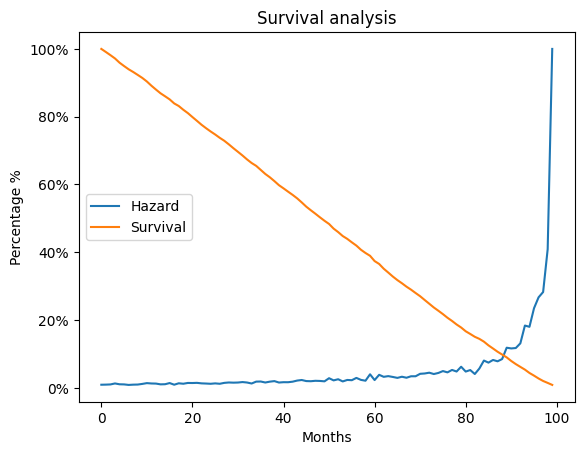

In [385]:
# plotting for a visual understanding
from matplotlib.ticker import PercentFormatter

fig,ax=plt.subplots()
ax.plot(df_churn_r.index,df_churn_h['Hazard']*100,label='Hazard')
ax.plot(df_churn_r.index,df_churn_s['Survival']*100,label='Survival')
ax.set(title='Survival analysis',xlabel='Months',ylabel='Percentage %')

ax.yaxis.set_major_formatter(PercentFormatter())
ax.legend()
ax.autoscale()

##### Observations:

We observe that hazard rates remain within a normal range for up to 60 months (5 years). This is likely due to many policyholders purchasing extended warranties of 5 years.

However, after 60 months, we notice a gradual increase in hazard rates. This trend becomes particularly pronounced around 80-84 months (approximately 7 years).

One possible explanation is that customers may have renewed their policies after the initial 5-year term, opting for a 2-year extension. This would extend coverage to around 7 years. Subsequently, many customers may have sold their vehicles at this point, as 7 years is a common ownership period.

Based on this churn analysis, we can conclude that the insurance company is effectively retaining customers. This is evidenced by the consistent survival rate and steady hazard rates throughout most of the policy lifetime.


###### Overall Assessment:
* **Effective Retention:** The insurance company appears to be effective in retaining customers for the initial 5-7 years.
* **Renewal Challenges:** The spike in hazard rates around 7 years suggests potential challenges in retaining customers beyond this point.
* **Customer Behavior:** The analysis indicates that many customers may be selling their vehicles around the 7-year mark, which could be influencing churn.

# Predctive Analysis

<Axes: >

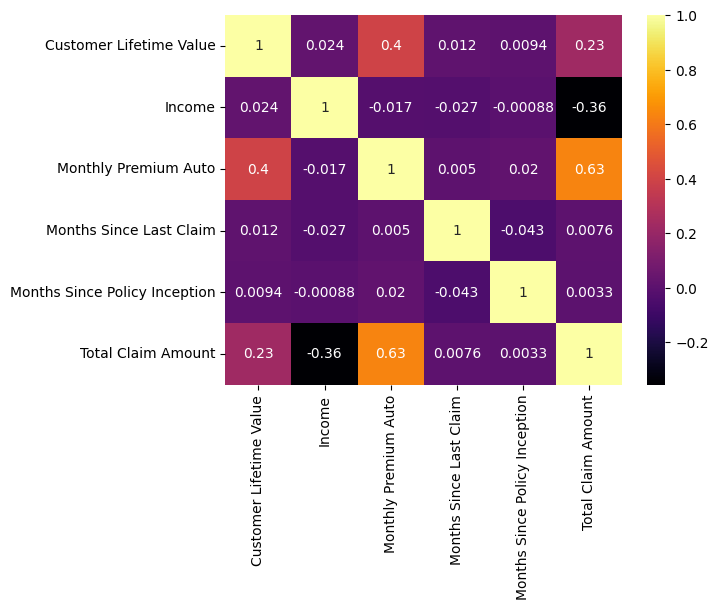

In [386]:
sns.heatmap(df_clean[num_cols].corr(),annot=True,cmap='inferno')

We see that there is strong relation between income and total claim; and monthly premium and total claim. So lets try to remove the dependency

In [387]:
df_clean[['Total Claim Amount','Income','Monthly Premium Auto']].describe()

,Total Claim Amount,Income,Monthly Premium Auto
count,9134.000000,9134.000000,9134.000000
mean,434.088794,37657.380009,93.219291
std,290.500092,30379.904734,34.407967
min,0.099007,0.000000,61.000000
25%,272.258244,0.000000,68.000000
50%,383.945434,33889.500000,83.000000
75%,547.514839,62320.000000,109.000000
max,2893.239678,99981.000000,298.000000


In [388]:
df_reg=df_clean.copy(deep=True)

# df_reg=df_reg[df_reg['Income']>0]
# df_reg=df_reg[df_reg['Customer Lifetime Value']>0]

# df_reg['Income_Total Claim_Premium']=df_reg['Monthly Premium Auto']*df_reg['Total Claim Amount']/df_reg['Income']
# df_reg.drop(['Monthly Premium Auto','Income','Total Claim Amount'],inplace=True,axis=1)

# num_cols.remove('Monthly Premium Auto')
# num_cols.remove('Income')
# num_cols.remove('Total Claim Amount')

# num_cols+=['Income_Total Claim_Premium']
num_cols

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Total Claim Amount']

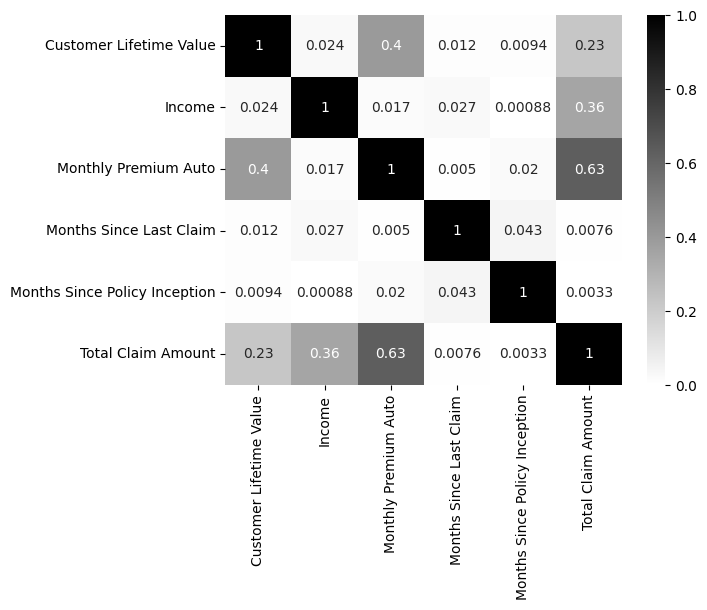

In [389]:
hm=sns.heatmap(df_reg[num_cols].corr().abs(),annot=True,cmap='gray_r',vmin=0, vmax=1)

<Axes: >

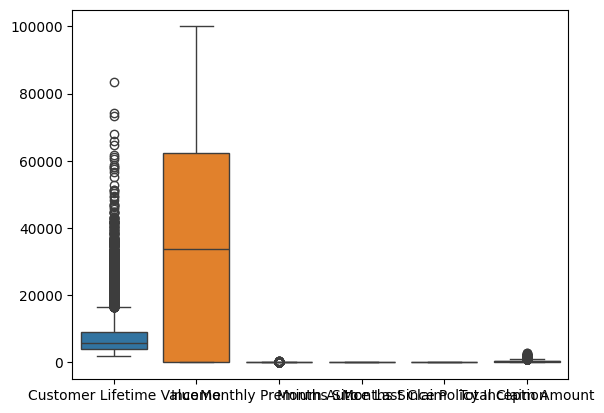

In [390]:
sns.boxplot(df_reg[num_cols])

In [391]:
# Treat outliers

# We are dropping outliers because these are the one with high customer value or high net work. These needs to be seperately in a seperate class

df_reg_or=df_reg.copy(deep=True)
df_reg_or.describe()
has_outliers=['Customer Lifetime Value']

for i in has_outliers:
    Q1 = df_reg[i].quantile(0.25)
    Q3 = df_reg[i].quantile(0.75)
    IQR = Q3 - Q1
    limit = Q3 + 1.5 * IQR
    
    df_reg_or=df_reg_or[df_reg_or[i]<limit]

<Axes: >

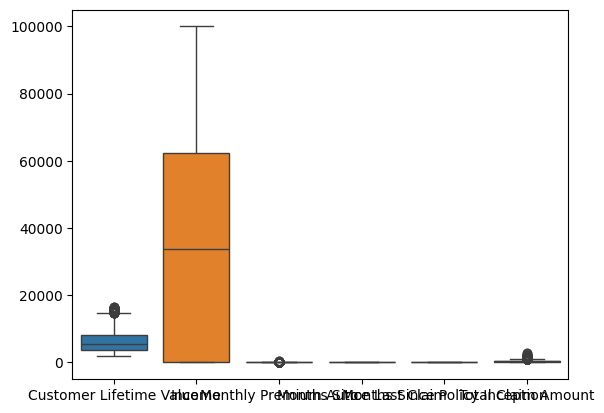

In [393]:
sns.boxplot(df_reg_or[num_cols])

## Prediciting CLV

In [394]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [395]:
# Train-Test Split 
train_df, test_df = train_test_split(df_reg_or, test_size=0.2, random_state=42)

# Preprocessor Pipeline for Numerical Scaling and Categorical Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)])

# Apply Transformations to Training Data
train_transformed = preprocessor.fit_transform(train_df)

# Apply Transformations to Test Data (use transform, not fit_transform)
test_transformed = preprocessor.transform(test_df)

# Convert Transformed Training Data to a Dense DataFrame for Easier Analysis
train_transformed_df = pd.DataFrame(train_transformed.toarray(), columns=(preprocessor.get_feature_names_out()))
test_transformed_df = pd.DataFrame(test_transformed.toarray(), columns=(preprocessor.get_feature_names_out()))

# Splitting features and target variable
X_train = train_transformed_df.drop(['num__Customer Lifetime Value','cat__Response_Yes'],axis=1)
y_train = train_df['Customer Lifetime Value']

X_test = test_transformed_df.drop(['num__Customer Lifetime Value','cat__Response_Yes'],axis=1)
y_test = test_df['Customer Lifetime Value']

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

from time import time

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': GradientBoostingRegressor(),
    'KNN':KNeighborsRegressor()
}

for name, model in models.items():
    start_time = time()  # Record start time before training
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    training_time = time() - start_time
    
    print(f"{name}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R-squared: {r2:.2f}")
    print(f"  MAPE: {mape:.2f}%")
    print(f"  Training Time: {training_time:.4f}s")
    

Linear Regression:
  MSE: 1099496.59
  MAE: 687.04
  R-squared: 0.90
  MAPE: 0.11%
  Training Time: 0.0220s
Ridge Regression:
  MSE: 1100186.06
  MAE: 685.29
  R-squared: 0.90
  MAPE: 0.11%
  Training Time: 0.0100s
Lasso Regression:
  MSE: 1096165.49
  MAE: 682.89
  R-squared: 0.90
  MAPE: 0.11%
  Training Time: 0.0205s
Random Forest:
  MSE: 751565.20
  MAE: 325.27
  R-squared: 0.93
  MAPE: 0.04%
  Training Time: 6.5378s
SVR:
  MSE: 11416214.94
  MAE: 2525.51
  R-squared: -0.06
  MAPE: 0.43%
  Training Time: 3.9591s
XGBoost:
  MSE: 931978.15
  MAE: 581.67
  R-squared: 0.91
  MAPE: 0.09%
  Training Time: 1.5633s
KNN:
  MSE: 5983090.39
  MAE: 1764.40
  R-squared: 0.44
  MAPE: 0.29%
  Training Time: 0.0250s


In [397]:
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 250],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    },
    'SVR': {
        'kernel': ['linear', 'rbf'],
        'C': [1, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 250],
        'learning_rate': [0.01, 0.1],
        'max_depth': [5]
    },
    'KNN': {
        'n_neighbors': [3, 5],
        'weights': ['uniform', 'distance']
    }
}

In [398]:
from time import time

best_results = {}

for name, model in models.items():
  start_time = time()  # Record start time before training

  if name in param_grids:
    randomized_search = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grids[name],
                                           n_iter=10,
                                           scoring='neg_mean_absolute_error',
                                           cv=2,
                                           n_jobs=-1,
                                           random_state=42)
    start_time = time() 
    randomized_search.fit(X_train, y_train)

    # Get the best model and predictions
    best_model = randomized_search.best_estimator_
    best_predictions = best_model.predict(X_test)

  else:
    # Train the model without tuning
    start_time = time() 
    model.fit(X_train, y_train)
    best_predictions = model.predict(X_test)

  # Calculate training time
  training_time = time() - start_time

  # Calculate metrics
  mae = mean_absolute_error(y_test, best_predictions)
  mse = mean_squared_error(y_test, best_predictions)
  r2 = r2_score(y_test, best_predictions)

  # Store results with training time
  best_results[name] = {
      'Best Params': randomized_search.best_params_ if name in param_grids else None,
      'MAE': mae,
      'MSE': mse,
      'R²': r2,
      'Training Time (s)': training_time
  }

best_results_df = pd.DataFrame(best_results).T

In [399]:
best_results_df.sort_values(by='R²',ascending=False)

,Best Params,MAE,MSE,R²,Training Time (s)
Random Forest,"{'n_estimators': 250, 'min_samples_split': 2, ...",323.780721,736753.591107,0.931332,29.990724
XGBoost,"{'n_estimators': 250, 'max_depth': 5, 'learnin...",333.059006,742560.570482,0.93079,9.840009
Lasso Regression,NaN,682.893068,1096165.494267,0.897833,0.020991
Linear Regression,NaN,687.042552,1099496.585603,0.897523,0.064518
Ridge Regression,NaN,685.292504,1100186.061745,0.897458,0.007998
SVR,"{'kernel': 'linear', 'C': 10}",802.697388,1821427.065092,0.830236,5.187365
KNN,"{'weights': 'distance', 'n_neighbors': 5}",1723.977016,5883219.198717,0.451661,0.256682


## Predicting Response

In [400]:
# Splitting features and target variable
X_train = train_transformed_df.drop('cat__Response_Yes',axis=1)
y_train = train_transformed_df['cat__Response_Yes']

X_test = test_transformed_df.drop('cat__Response_Yes',axis=1)
y_test = test_transformed_df['cat__Response_Yes']

In [401]:
X_train.columns

Index(['num__Customer Lifetime Value', 'num__Income',
       'num__Monthly Premium Auto', 'num__Months Since Last Claim',
       'num__Months Since Policy Inception', 'num__Total Claim Amount',
       'cat__Coverage_Extended', 'cat__Coverage_Premium',
       'cat__Education_College', 'cat__Education_Doctor',
       'cat__Education_High School or Below', 'cat__Education_Master',
       'cat__EmploymentStatus_Employed', 'cat__EmploymentStatus_Medical Leave',
       'cat__EmploymentStatus_Retired', 'cat__EmploymentStatus_Unemployed',
       'cat__Gender_M', 'cat__Location Code_Suburban',
       'cat__Location Code_Urban', 'cat__Marital Status_Married',
       'cat__Marital Status_Single', 'cat__Number of Open Complaints_1',
       'cat__Number of Open Complaints_2', 'cat__Number of Open Complaints_3',
       'cat__Number of Open Complaints_4', 'cat__Number of Open Complaints_5',
       'cat__Number of Policies_2', 'cat__Number of Policies_3',
       'cat__Number of Policies_4', 'cat__Numb

In [402]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from time import time

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)  # Include probability for some metrics
}

for name, model in models.items():
    start_time = time()  # Record start time before training

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    training_time = time() - start_time

    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-score: {f1:.2f}")
    print(f"  Training Time: {training_time:.4f}s")
    print("  Confusion Matrix:\n", conf_matrix)

Logistic Regression:
  Accuracy: 0.87
  Precision: 0.59
  Recall: 0.14
  F1-score: 0.23
  Training Time: 0.0726s
  Confusion Matrix:
 [[1419   22]
 [ 191   32]]
Random Forest:
  Accuracy: 1.00
  Precision: 0.97
  Recall: 1.00
  F1-score: 0.99
  Training Time: 0.9222s
  Confusion Matrix:
 [[1435    6]
 [   0  223]]
XGBoost:
  Accuracy: 0.89
  Precision: 0.86
  Recall: 0.19
  F1-score: 0.31
  Training Time: 1.9851s
  Confusion Matrix:
 [[1434    7]
 [ 181   42]]
SVM:
  Accuracy: 0.89
  Precision: 0.78
  Recall: 0.23
  F1-score: 0.35
  Training Time: 26.4509s
  Confusion Matrix:
 [[1427   14]
 [ 172   51]]


Random forest has the best results.

# References:
* https://www.kaggle.com/code/sittakonphommee/customer-lifetime-value
* https://www.kaggle.com/code/putanyn/660632067-3rd-lab-customer-lifetime-value#Algorithm-Implementation


In [403]:
# END